# Bank Transaction Dataset for Fraud Detection

## Introduction
This dataset contains **2,512 bank transactions** with **16 features** related to transaction details, customer information, and device/location data. The goal is to analyze the dataset to detect fraudulent transactions and build a predictive model for fraud detection.

### Dataset Overview:
- **Rows**: 2,512 transactions
- **Columns**: 16 features (described below)

### Dataset Columns Description

Below is a detailed description of each column in the dataset:

1. **TransactionID**: Unique alphanumeric identifier for each transaction.
2. **AccountID**: Unique identifier for each account, with multiple transactions per account.
3. **TransactionAmount**: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
4. **TransactionDate**: Timestamp of each transaction, capturing date and time.
5. **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
6. **Location**: Geographic location of the transaction, represented by U.S. city names.
7. **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
8. **IP Address**: IPv4 address associated with the transaction, with occasional changes for some accounts.
9. **MerchantID**: Unique identifier for merchants, showing preferred and outlier merchants for each account.
10. **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
11. **CustomerAge**: Age of the account holder, with logical groupings based on occupation.
12. **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
13. **TransactionDuration**: Duration of the transaction in seconds, varying by transaction type.
14. **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.
15. **AccountBalance**: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
16. **PreviousTransactionDate**: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.

### Load the dataset

In [670]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/bank_transactions.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### Custom Plot Styling and Theming


In this section, we define custom plotting functions that apply a unified aesthetic style to our visualizations using Seaborn and Matplotlib. We establish a global theme with a dark background and light gray elements, ensuring that all titles, labels, legends, and grid lines share a consistent appearance.

#### Features

- **Global Theme:**  
  The global theme sets the background color and text color uniformly across all plots, enhancing readability and visual appeal.

- **Custom Plot Functions:**  
  We provide tailored functions for generating boxplots, countplots, and scatterplots. These functions enforce our aesthetic style automatically, making it easy to create professional and consistent visualizations.

- **Grayscale Palette for Hue:**  
  When using the `hue` parameter, a grayscale ("Greys") palette is generated. This ensures that all graphs with hue maintain a uniform gray-scale appearance while still differentiating between categories.


In [671]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color constants
BG_COLOR = "#284B63"       # Dark background color for figures and axes
LIGHT_GRAY = "#D9D9D9"     # Light gray used for grid lines, borders, and text

def set_custom_theme():
    """
    Set a custom global theme for seaborn plots.
    This theme uses a dark background with light grid lines and text.
    Global text (titles, labels, etc.) is set to LIGHT_GRAY.
    """
    sns.set_theme(
        style="whitegrid",
        palette="muted",
        rc={
            "axes.facecolor": BG_COLOR,       
            "figure.facecolor": BG_COLOR,     
            "grid.color": LIGHT_GRAY,         
            "axes.grid": True,
            "axes.edgecolor": LIGHT_GRAY,     
            "xtick.color": LIGHT_GRAY,        
            "ytick.color": LIGHT_GRAY,        
            "axes.labelcolor": LIGHT_GRAY,    
            "axes.titlesize": 14,             
            "axes.titleweight": 'bold',       
            "text.color": LIGHT_GRAY,
        }
    )

# Apply the custom theme globally
set_custom_theme()

def custom_boxplot(*args, **kwargs):
    """
    Create a custom styled boxplot with predefined aesthetic parameters.
    
    Parameters:
        *args: Positional arguments to pass to sns.boxplot.
        **kwargs: Keyword arguments to pass to sns.boxplot.
    
    Returns:
        ax: The matplotlib Axes object containing the boxplot.
    """
    kwargs.setdefault("color", LIGHT_GRAY)
    kwargs.setdefault("flierprops", dict(markerfacecolor=LIGHT_GRAY, marker='o', markersize=7))
    kwargs.setdefault("boxprops", dict(edgecolor=LIGHT_GRAY, linewidth=1))
    kwargs.setdefault("medianprops", dict(color=LIGHT_GRAY, linewidth=1))
    kwargs.setdefault("capprops", dict(color=LIGHT_GRAY, linewidth=1))
    kwargs.setdefault("whiskerprops", dict(color=LIGHT_GRAY, linewidth=1))
    
    ax = sns.boxplot(*args, **kwargs)
    
    # Update legend properties if a legend is present
    legend = ax.get_legend()
    if legend:
        plt.setp(legend.get_texts(), color=LIGHT_GRAY)
        if legend.get_title() is not None:
            legend.get_title().set_color(LIGHT_GRAY)
        legend.get_frame().set_edgecolor(LIGHT_GRAY)
    
    return ax

def custom_countplot(*args, **kwargs):
    """
    Create a custom styled countplot with a predefined color scheme and legend adjustments.
    
    If hue is provided, a grayscale palette ("Greys") is automatically generated with a number of
    colors equal to the number of unique hue values so that the bars are distinct yet in shades of gray.
    If hue is not provided, a constant color (LIGHT_GRAY) is used.
    
    Parameters:
        *args: Positional arguments to pass to sns.countplot.
        **kwargs: Keyword arguments to pass to sns.countplot.
    
    Returns:
        ax: The matplotlib Axes object containing the countplot.
    """
    if 'hue' in kwargs:
        if "palette" not in kwargs:
            data_arg = kwargs.get("data", None)
            hue_var = kwargs.get("hue", None)
            if data_arg is not None and hue_var is not None:
                unique_vals = data_arg[hue_var].unique()
                n_colors = len(unique_vals)
                kwargs["palette"] = sns.color_palette("Greys", n_colors=n_colors)
    else:
        kwargs.setdefault("color", LIGHT_GRAY)
    
    kwargs.setdefault("edgecolor", LIGHT_GRAY)
    
    ax = sns.countplot(*args, **kwargs)
    
    # Update legend properties if a legend is present
    legend = ax.get_legend()
    if legend:
        plt.setp(legend.get_texts(), color=LIGHT_GRAY)
        if legend.get_title() is not None:
            legend.get_title().set_color(LIGHT_GRAY)
        legend.get_frame().set_edgecolor(LIGHT_GRAY)
    
    return ax

def custom_scatterplot(x, y, data, hue=None, **kwargs):
    """
    Create a custom styled scatterplot with predefined aesthetics and legend adjustments.
    
    If hue is provided, a grayscale palette is generated. If not, the markers will be set to LIGHT_GRAY.
    """
    if hue is None:
        kwargs.setdefault("color", LIGHT_GRAY)
    else:
        if "palette" not in kwargs:
            unique_vals = data[hue].unique()
            n_colors = len(unique_vals)
            kwargs["palette"] = sns.color_palette("Greys", n_colors=n_colors)
            
    kwargs.setdefault("edgecolor", LIGHT_GRAY)
    kwargs.setdefault("s", 50)         # Marker size
    kwargs.setdefault("alpha", 0.7)      # Transparency
    
    ax = sns.scatterplot(x=x, y=y, hue=hue, data=data, **kwargs)
    
    # If hue is provided, update the legend to match the theme.
    if hue:
        legend = ax.get_legend()
        if legend:
            plt.setp(legend.get_texts(), color=LIGHT_GRAY)
            if legend.get_title() is not None:
                legend.get_title().set_color(LIGHT_GRAY)
            legend.get_frame().set_edgecolor(LIGHT_GRAY)
    
    return ax



## Basic Dataset Information

Before proceeding with further steps, it is important to understand the dataset's structure and its summary statistics. This initial exploration helps in getting a clear picture of the data's composition and potential areas that might require cleaning.

**Exploratory Steps:**

- **Dataset Overview:**  
  Use `df.info()` to display the structure of the dataset, including data types and non-null counts.
  
- **Summary Statistics:**  
  Use `df.describe()` to generate summary statistics for numerical columns (mean, median, standard deviation, etc.).

In [672]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

### Observations from `df.info()`:
- The dataset has **2,512 rows** and **16 columns**.
- There are **no missing values** in any column (all columns have 2,512 non-null entries).
- Data types include:
  - **Float64**: `TransactionAmount`, `AccountBalance`
  - **Int64**: `CustomerAge`, `TransactionDuration`, `LoginAttempts`
  - **Object**: All other columns (e.g., `TransactionID`, `AccountID`, `TransactionDate`, etc.)

In [673]:
# Display summary statistics for numerical columns
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Observations from `df.describe()`:

1. **TransactionAmount**:
   - Average: **\$297.59**, with a wide range from **\$0.26** to **\$1,919.11**.
   - 75% of transactions are below **\$414.53**.

2. **CustomerAge**:
   - Average age: **44.67 years**, ranging from **18** to **80**.
   - Median age: **45 years**.

3. **TransactionDuration**:
   - Average duration: **119.64 seconds**, ranging from **10** to **300 seconds**.
   - 75% of transactions complete in under **161 seconds**.

4. **LoginAttempts**:
   - Average: **1.12 attempts**, with most transactions (75%) involving only **1 attempt**.
   - Maximum attempts: **5**.

5. **AccountBalance**:
   - Average balance: **\$5,114.30**, ranging from **\$101.25** to **\$14,977.99**.
   - Median balance: **\$4,735.51**.


## Data Cleaning

In this section, we perform essential data cleaning steps to prepare our dataset for analysis or modeling. These steps ensure that the data is accurate, consistent, and reliable by addressing potential issues.

**Key Data Cleaning Tasks:**

- **Handling Missing and Duplicated Values:**  
  Identify and address missing data and duplicate records.
  
- **Data Conversion:**  
  Standardize data formats (e.g., date formatting and type conversion).

- **Outlier Detection:**  
  Detect and manage outliers that might affect the analysis.

- **Categorical Value Consistency:**  
  Review and ensure that unique values in categorical columns are consistent and valid.

By executing these tasks, the dataset becomes clean and ready for subsequent analysis or machine learning.


### Handle Missing and Duplicated Values

In [674]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [675]:
df.duplicated().sum()


np.int64(0)

#### Observations
After performing the check, no missing or duplicated values were found in the dataset. This indicates that the data is complete and consistent, and no further cleaning is needed regarding missing or duplicate entries.


### Data Convertion

In [676]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


#### Description

In this step, we convert the columns **'TransactionDate'** and **'PreviousTransactionDate'** to the **datetime** format using `pd.to_datetime()`. This ensures that the dates are correctly recognized as datetime objects in Pandas, allowing for easier date manipulation, sorting, and comparison.


### Outliers Check

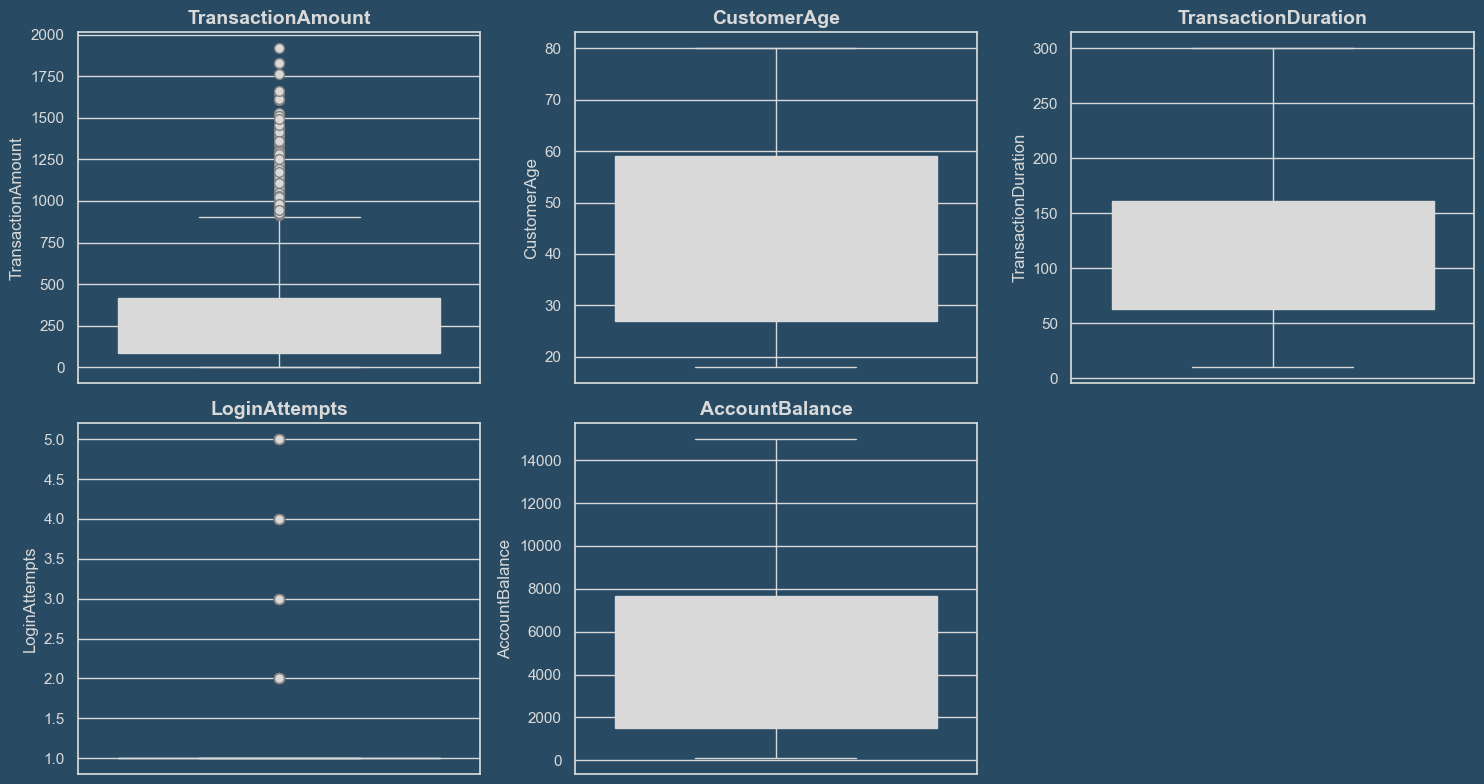

In [677]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    custom_boxplot(y=df[col]) 
    plt.title(col, color='#D9D9D9') 
plt.tight_layout()
plt.show()

#### Observations:
1. **TransactionAmount**:
   - Some transactions have very high amounts (up to \$1,919.11), which could be outliers or legitimate large transactions.
2. **CustomerAge**:
   - The age range (18 to 80) is reasonable, with no outliers.
3. **TransactionDuration**:
   - Some transactions take up to 300 seconds (5 minutes), which might be outliers or indicate unusual activity.
4. **LoginAttempts**:
   - Most transactions involve 1 login attempt, but some have up to 5 attempts, which could indicate anomalies.
5. **AccountBalance**:
   - Some accounts have very high balances (up to \$14,977.99), which could be outliers or legitimate for high-net-worth individuals.

### Unique Values Categorical Columns

In [678]:
# Check unique values in categorical columns
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 

#### Observations:
1. **TransactionType**:
   - Only two values: `Debit` and `Credit`. No inconsistencies.
2. **Location**:
   - All values are valid U.S. city names. No inconsistencies.
3. **DeviceID**:
   - All values are alphanumeric and unique. No inconsistencies.
4. **IP Address**:
   - All values are valid IPv4 addresses. No inconsistencies.
5. **MerchantID**:
   - All values are alphanumeric and unique. No inconsistencies.
6. **Channel**:
   - Only three values: `Branch`, `ATM`, and `Online`. No inconsistencies.
7. **CustomerOccupation**:
   - Only four values: `Student`, `Doctor`, `Engineer`, and `Retired`. No inconsistencies.

### Summary of Data Cleaning

1. **No Missing Values or Duplicates**:
   - The dataset is clean, with no missing values or duplicate rows.

2. **Data Type Conversion**:
   - `TransactionDate` and `PreviousTransactionDate` have been converted to `datetime`.

3. **Outliers**:
   - Outliers were identified in `TransactionAmount`, `TransactionDuration`, and `LoginAttempts`, but they were retained as they might be relevant for fraud detection.

4. **Categorical Data**:
   - No inconsistencies were found in categorical columns.

The dataset is now ready for **Exploratory Data Analysis (EDA)**.

## Exploratory Data Analysis (EDA)

In this section, we explore the dataset using univariate, bivariate, and multivariate analyses to uncover patterns, trends, and relationships. This comprehensive approach helps us understand the data's distribution, interactions between variables, and overall structure, which is essential for identifying potential features for fraud detection.

**Key EDA Tasks:**

- **Univariate Analysis:**  
  Examine individual variables using histograms, boxplots, and density plots to assess distributions, detect outliers, and evaluate skewness.

- **Bivariate Analysis:**  
  Explore relationships between two variables through scatterplots, bar charts, and correlation metrics to identify potential associations and dependencies.

- **Multivariate Analysis:**  
  Investigate interactions among multiple variables using pair plots, heatmaps, and other advanced visualization techniques to uncover complex relationships.

By executing these tasks, we obtain a deep understanding of the dataset, paving the way for effective data modeling and fraud detection.


### Univariate Analysis


#### **Numerical Columns**

We are not using Account ID and Transaction ID because they are not relevant in this analysis


##### Transaction Amount

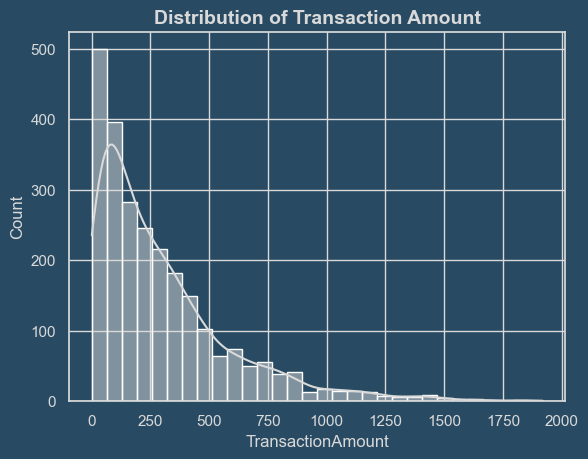

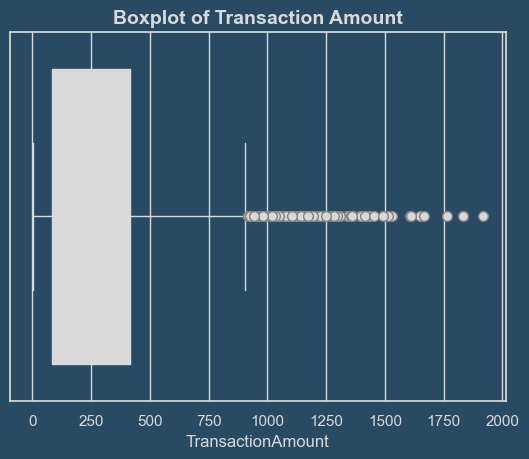

In [679]:
# Histogram for TransactionAmount
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Amount',color="#D9D9D9")
plt.show()

# Boxplot for TransactionAmount
custom_boxplot(x=df['TransactionAmount'])
plt.title('Boxplot of Transaction Amount',color="#D9D9D9")
plt.show()

##### Costumer Age

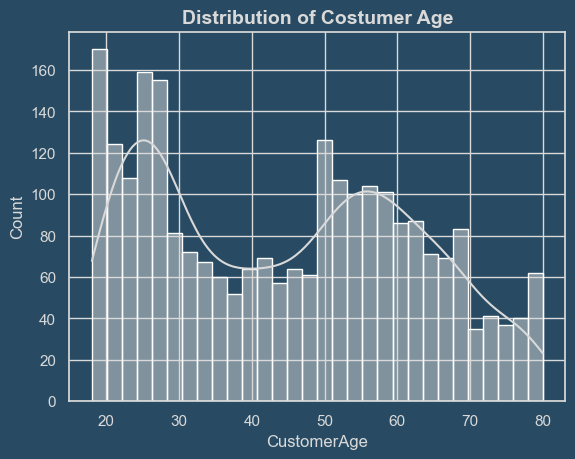

In [680]:

# Histogram for CustomerAge
sns.histplot(df['CustomerAge'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Costumer Age',color="#D9D9D9")
plt.show()


##### Account Balance

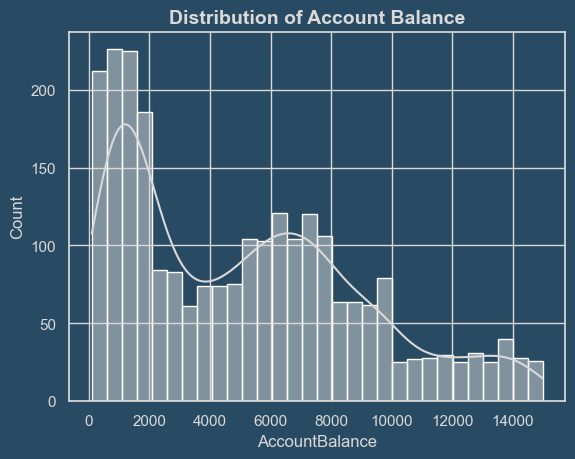

In [681]:

# Histogram for AccountBalance
sns.histplot(df['AccountBalance'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Account Balance',color="#D9D9D9")
plt.show()


##### Transaction Duration

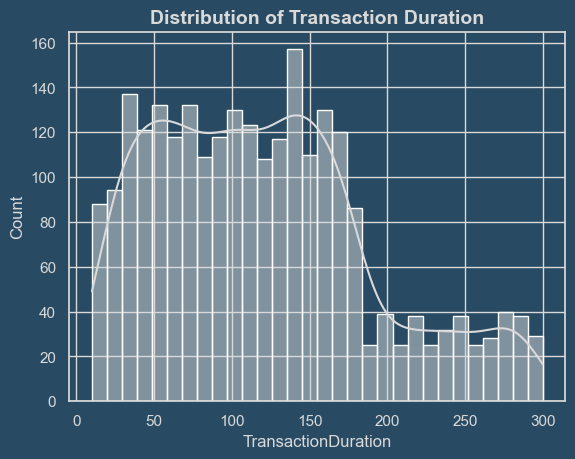

In [682]:

# Histogram for TransactionDuration
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Duration',color="#D9D9D9")
plt.show()



##### Login Attempts

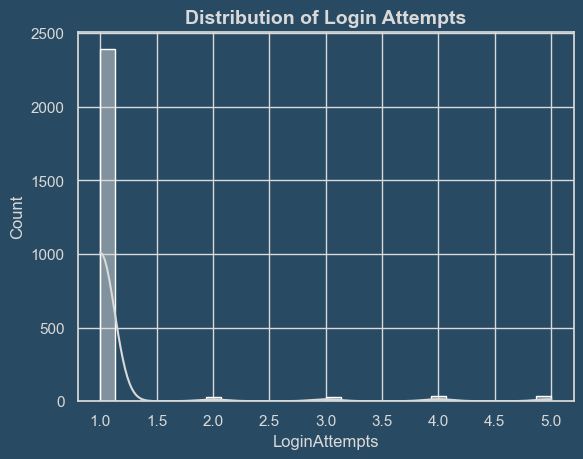

In [683]:

# Histogram for LoginAttempts
sns.histplot(df['LoginAttempts'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Login Attempts',color="#D9D9D9")
plt.show()


#### **Categorical Columns**

##### TransactionType

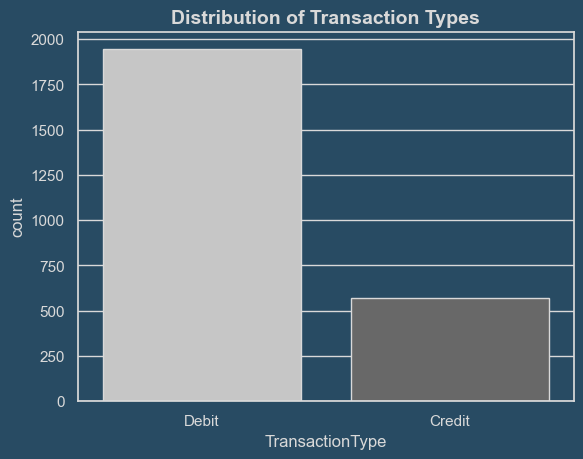

In [684]:
# Transaction Type
custom_countplot(x='TransactionType', hue='TransactionType' , data=df)
plt.title('Distribution of Transaction Types', color="#D9D9D9")
plt.show()


##### Location

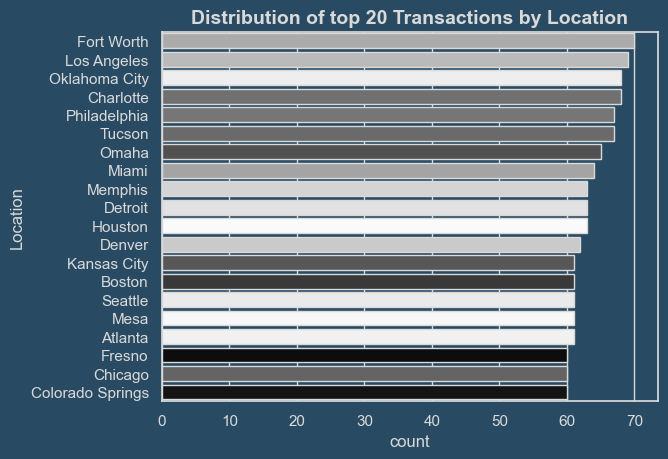

In [685]:
# Location

top_10_locations = df['Location'].value_counts().index[:20]

custom_countplot(y='Location', data=df, hue='Location', order=top_10_locations)
plt.title('Distribution of top 20 Transactions by Location', color="#D9D9D9")
plt.show()

##### Channel

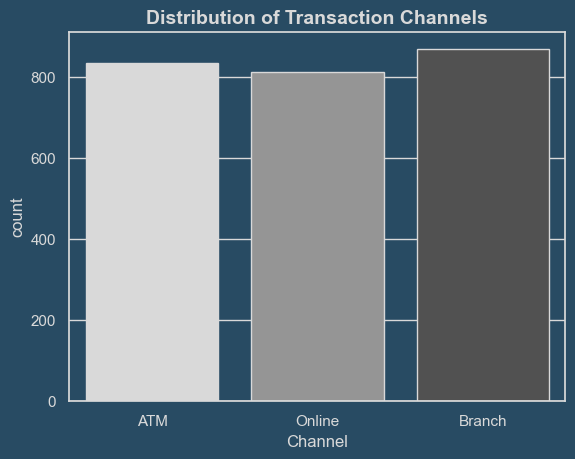

In [686]:
custom_countplot(x='Channel', hue='Channel', data=df)
plt.title('Distribution of Transaction Channels', color="#D9D9D9")
plt.show()

##### CustomerOccupation

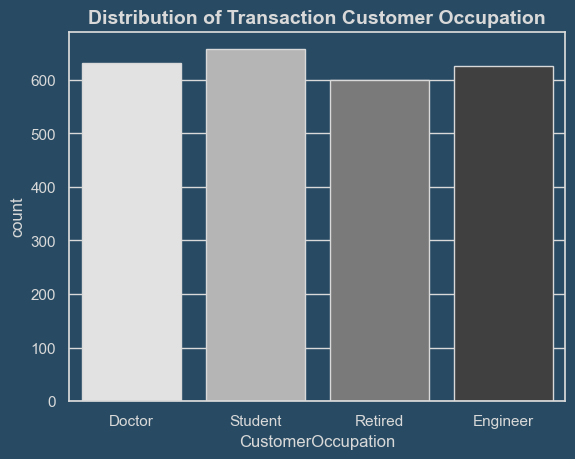

In [687]:
custom_countplot(x='CustomerOccupation' ,hue='CustomerOccupation' , data=df)
plt.title('Distribution of Transaction Customer Occupation', color="#D9D9D9")
plt.show()

### Bivariate Analysis

#### TransactionAmount vs AccountBalance

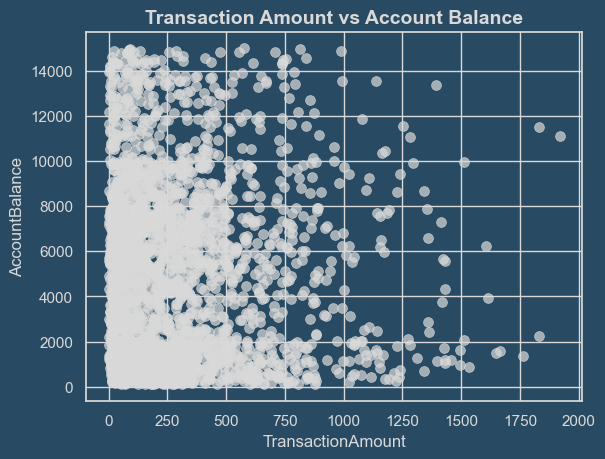

In [688]:
custom_scatterplot(x='TransactionAmount', y='AccountBalance', data=df, )
plt.title('Transaction Amount vs Account Balance', color="#D9D9D9")
plt.show()

#### TransactionAmount vs CustomerAge



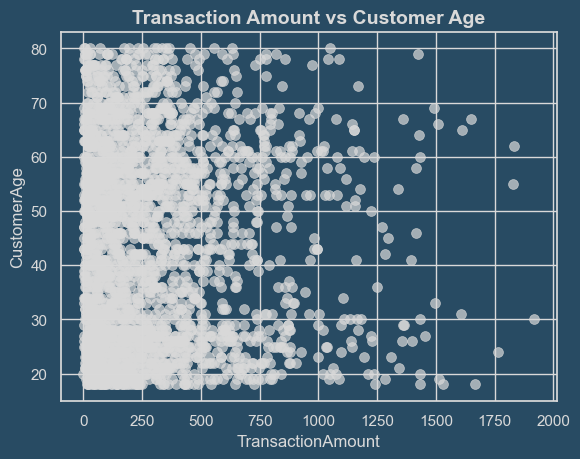

In [689]:
custom_scatterplot(x='TransactionAmount', y='CustomerAge', data=df)
plt.title('Transaction Amount vs Customer Age', color="#D9D9D9")
plt.show()

#### TransactionAmount vs TransactionDuration



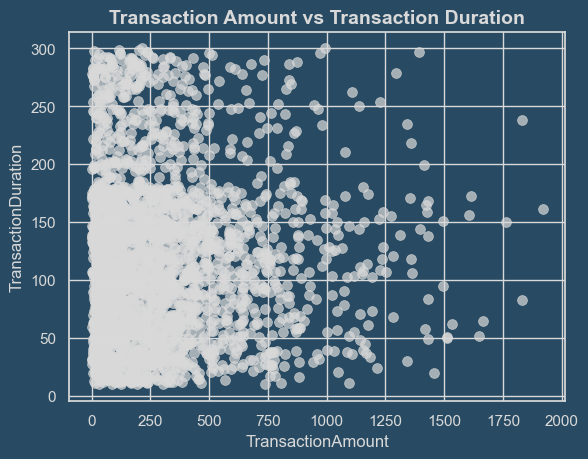

In [690]:
custom_scatterplot(x='TransactionAmount', y='TransactionDuration', data=df)
plt.title('Transaction Amount vs Transaction Duration', color="#D9D9D9")
plt.show()

#### AccountBalance vs CustomerAge	

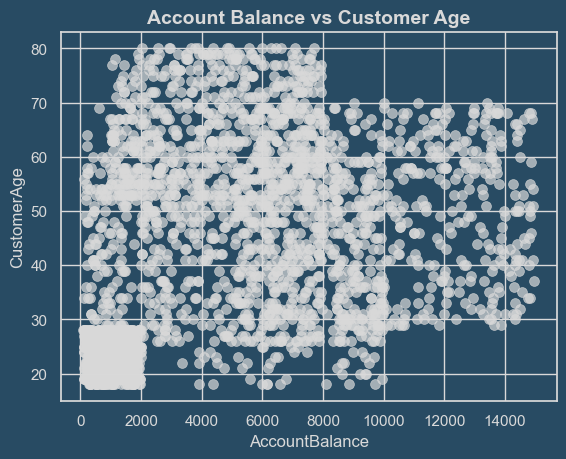

In [691]:
custom_scatterplot(x='AccountBalance', y='CustomerAge', data=df)
plt.title('Account Balance vs Customer Age', color="#D9D9D9")
plt.show()

#### AccountBalance vs TransactionDuration	

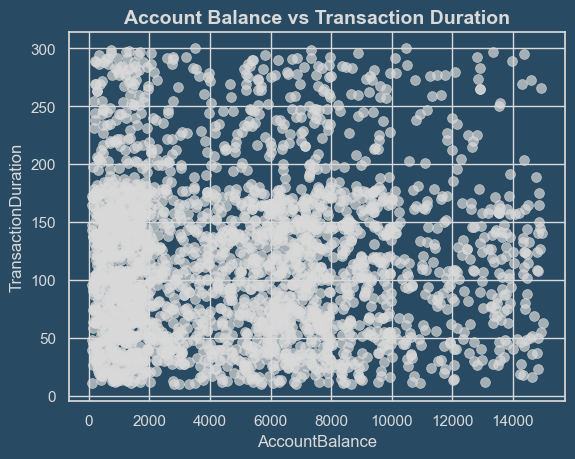

In [692]:
custom_scatterplot(x='AccountBalance', y='TransactionDuration', data=df)
plt.title('Account Balance vs Transaction Duration', color="#D9D9D9")
plt.show()

#### **Numerical vs Categorical**


#### TransactionAmount vs TransactionType



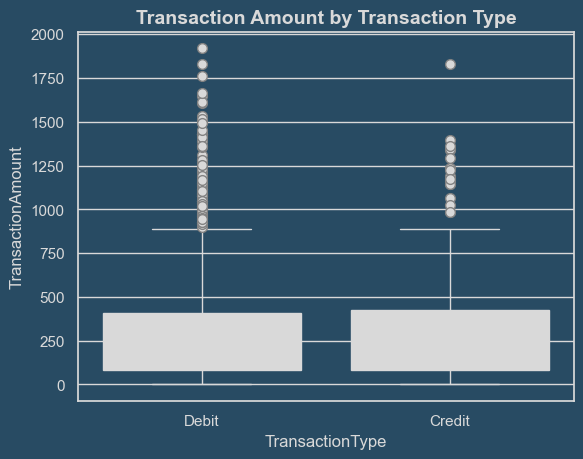

In [693]:
custom_boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type', color="#D9D9D9")
plt.show()

#### TransactionAmount vs Location



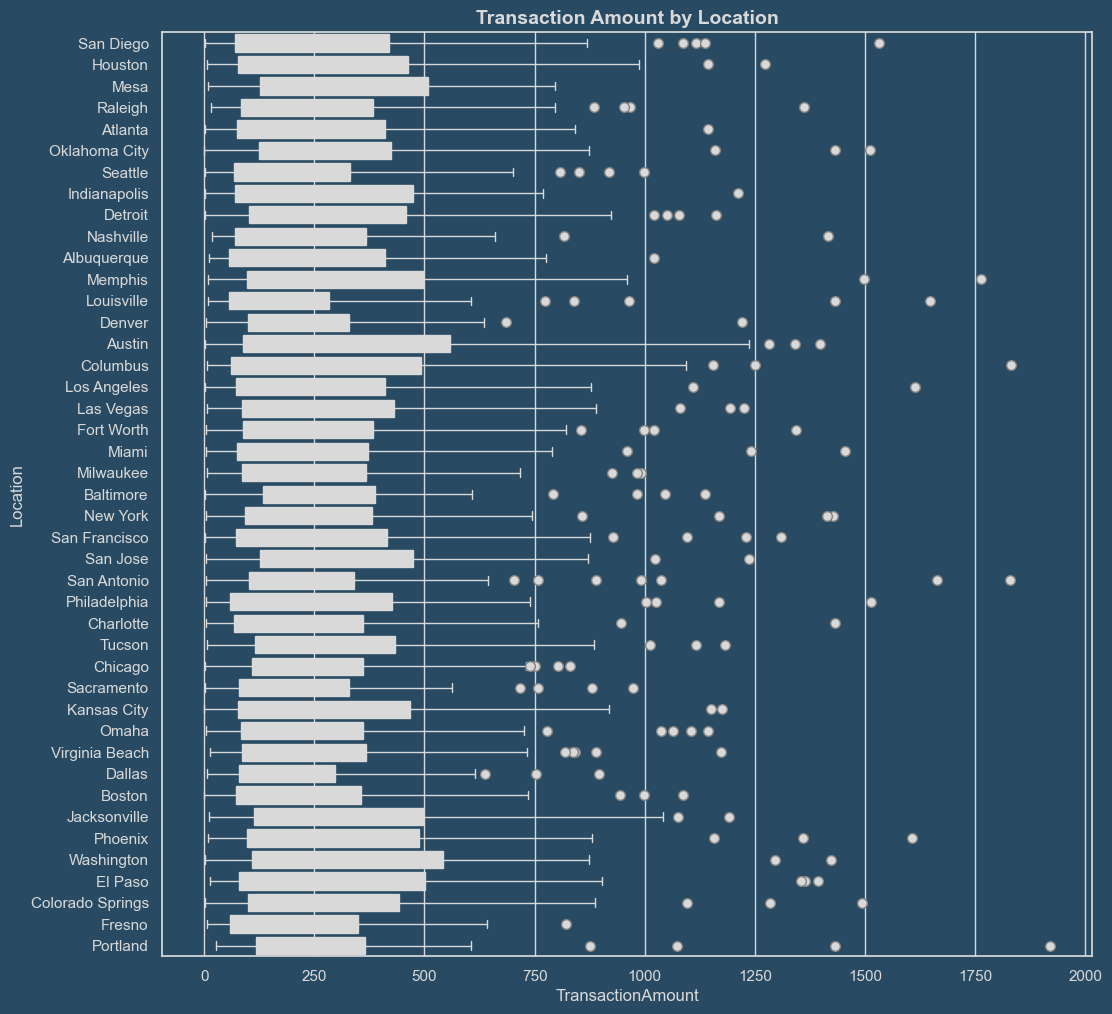

In [694]:
plt.figure(figsize=(12, 12))  # Aumentar tamaño
custom_boxplot(y='Location', x='TransactionAmount', data=df)
plt.title('Transaction Amount by Location', color="#D9D9D9")
plt.show()


#### TransactionAmount vs Channel



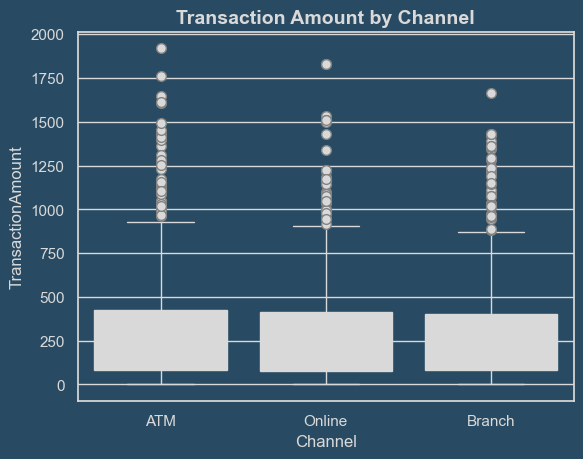

In [695]:
custom_boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Channel', color="#D9D9D9")
plt.show()

#### CustomerAge vs TransactionType	

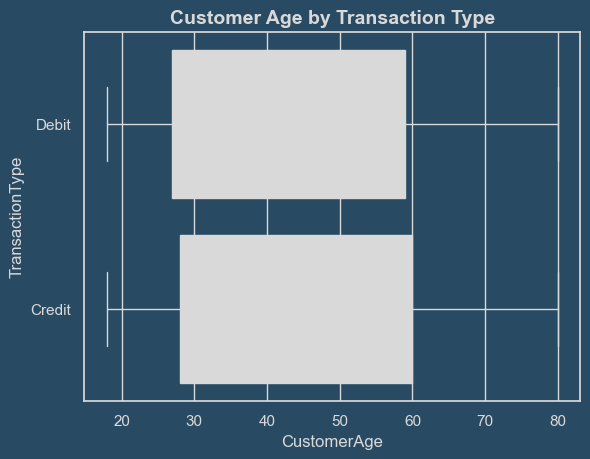

In [696]:
custom_boxplot(x='CustomerAge', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

#### AccountBalance vs TransactionType	

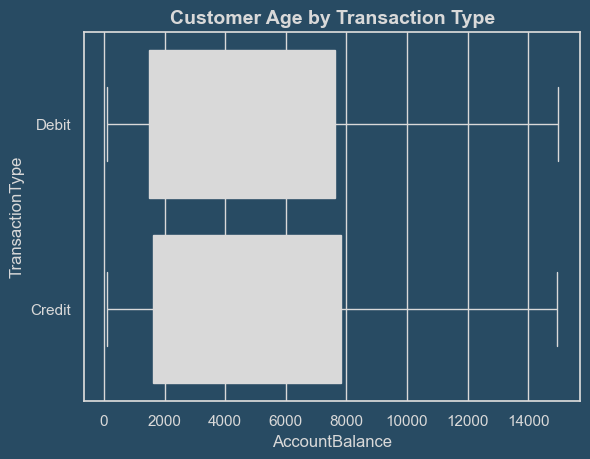

In [697]:
custom_boxplot(x='AccountBalance', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

#### **Categorical vs Categorical**


#### TransactionType vs Location

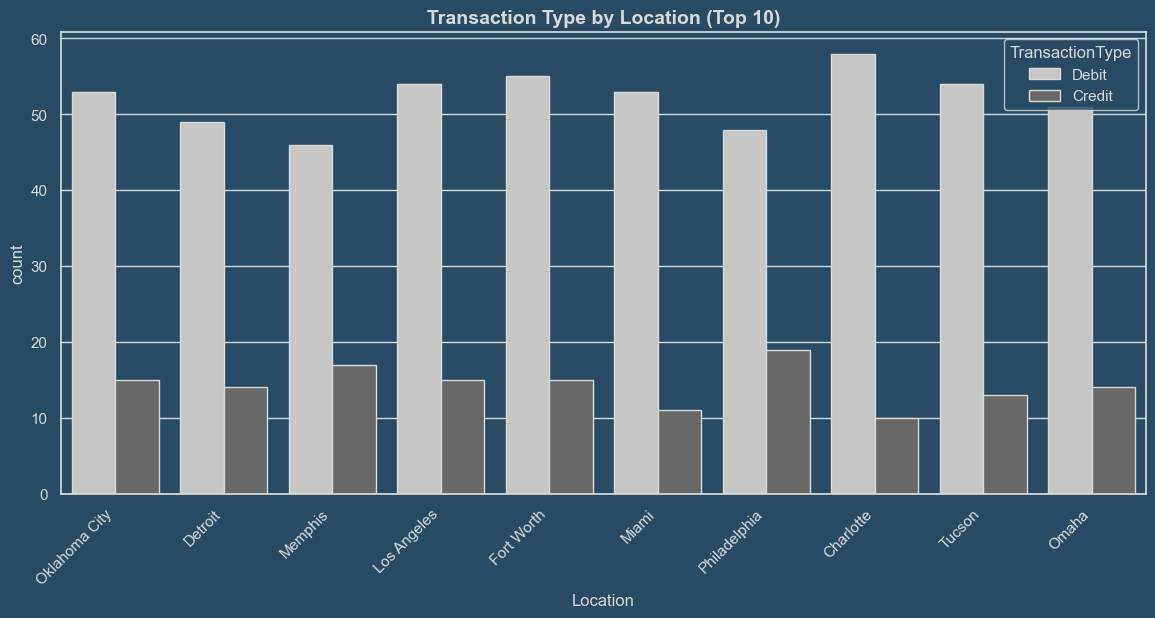

In [698]:
plt.figure(figsize=(14, 6))  # Aumentar el tamaño del gráfico
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]
custom_countplot(x='Location', hue='TransactionType', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas
plt.title('Transaction Type by Location (Top 10)', color="#D9D9D9")
plt.show()


#### TransactionType vs Channel

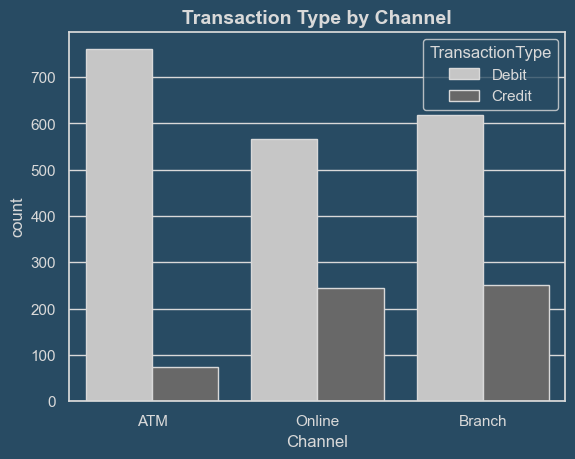

In [699]:
custom_countplot(x='Channel', hue='TransactionType', data=df)
plt.title('Transaction Type by Channel', color="#D9D9D9")
plt.show()

#### Location vs Channel	

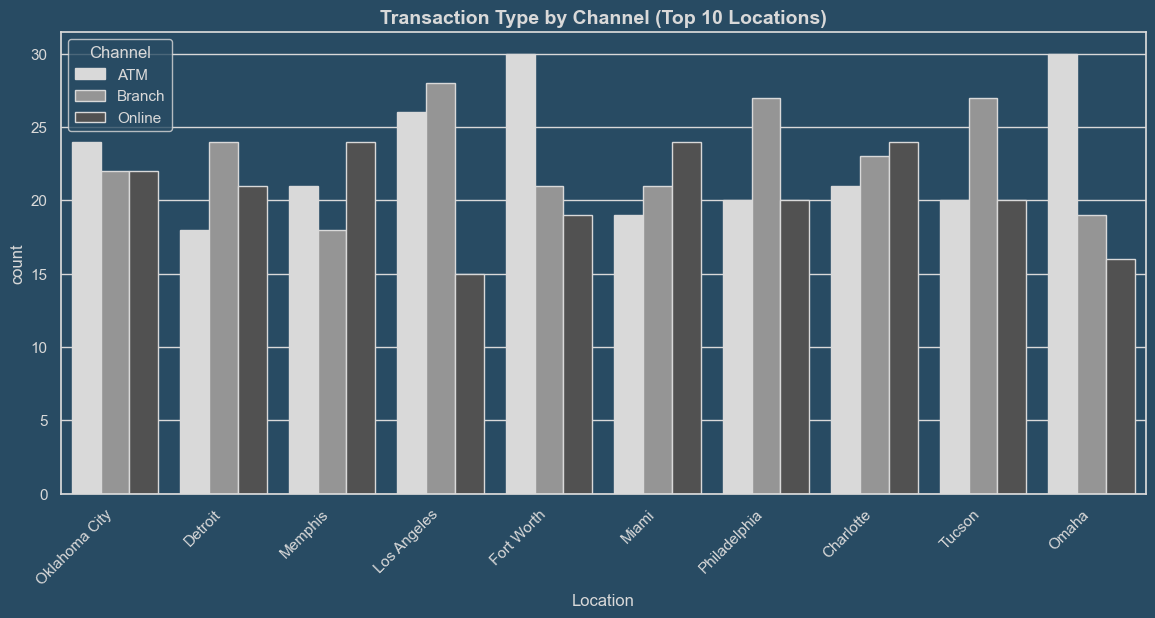

In [700]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='Channel', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Channel (Top 10 Locations)', color="#D9D9D9")
plt.show()


#### TransactionType vs CustomerOccupation

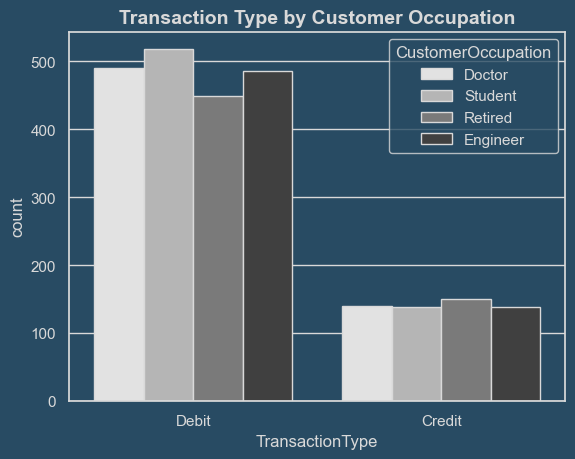

In [701]:
custom_countplot(x='TransactionType', hue='CustomerOccupation', data=df)
plt.title('Transaction Type by Customer Occupation', color="#D9D9D9")
plt.show()

#### Location vs CustomerOccupation	

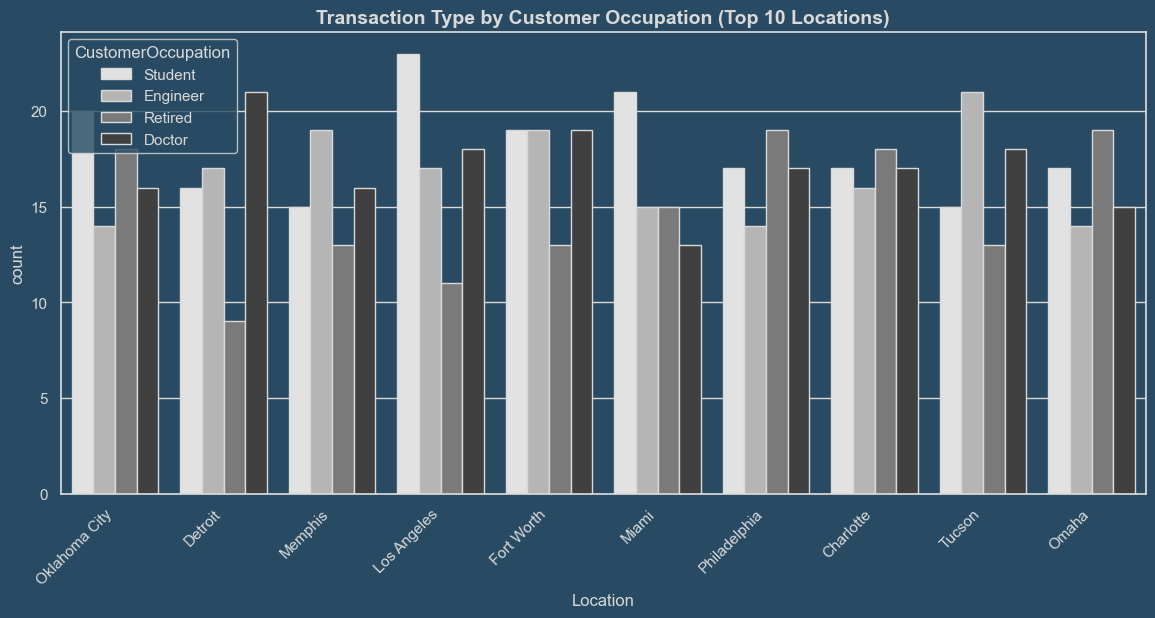

In [702]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='CustomerOccupation', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Customer Occupation (Top 10 Locations)', color="#D9D9D9")
plt.show()


### Multivariate Analysis

#### Correlation Heatmap of Numerical Variables

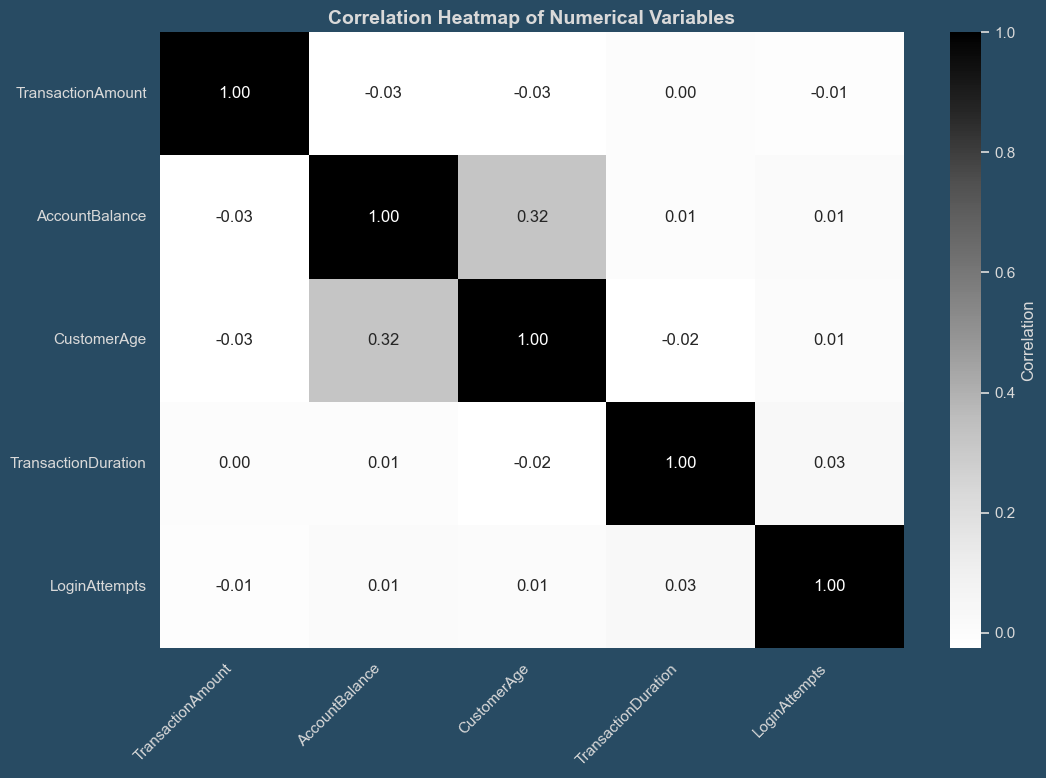

In [703]:
# Select numerical columns
numerical_columns = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Hacer el gráfico más grande para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(correlation_matrix, annot=True, cmap="Greys", fmt=".2f", annot_kws={"size": 12, "ha": "center", "va": "center"}, cbar_kws={'label': 'Correlation'})

# Personalización adicional
plt.title('Correlation Heatmap of Numerical Variables', color="#D9D9D9")
plt.xticks(rotation=45, ha="right", color="#D9D9D9")  # Rotar las etiquetas del eje X y color
plt.yticks(rotation=0, color="#D9D9D9")  # Cambiar color de las etiquetas del eje Y
plt.show()


#### Transaction Amount by Channel (Top 10 Devices)

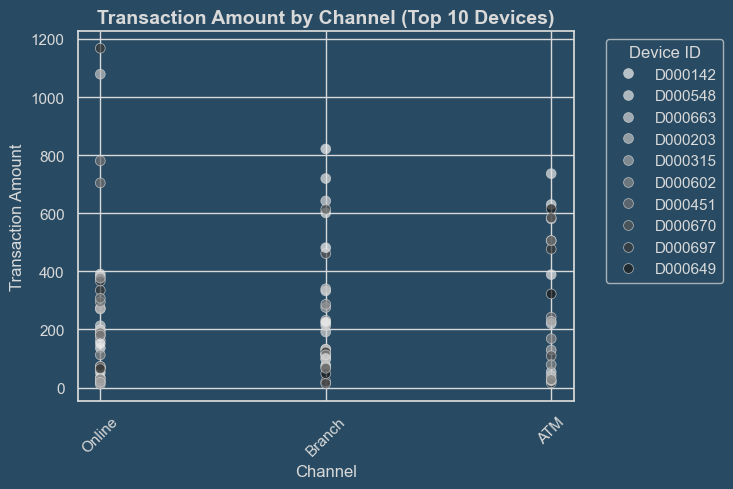

In [704]:
top_devices = df['DeviceID'].value_counts().nlargest(10).index
filtered_df = df[df['DeviceID'].isin(top_devices)]

custom_scatterplot(data=filtered_df, x='Channel', y='TransactionAmount', hue='DeviceID')
plt.title("Transaction Amount by Channel (Top 10 Devices)",color='#D9D9D9')
plt.xlabel("Channel")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Device ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Transaction Amount by Transaction Type and Age Group

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_15304\1595227904.py:53: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#D9D9D9'` for the same effect.

  ax = sns.boxplot(*args, **kwargs)


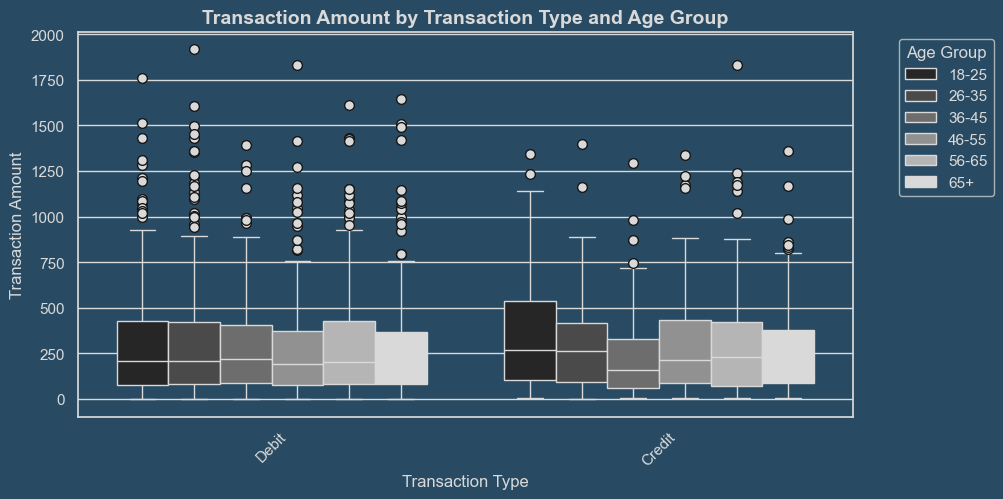

In [705]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[18, 25, 35, 45, 55, 65, 100], 
                        labels=["18-25", "26-35", "36-45", "46-55", "56-65", "65+"])

plt.figure(figsize=(10, 5))
custom_boxplot(data=df, x="TransactionType", y="TransactionAmount", hue="AgeGroup")
plt.title("Transaction Amount by Transaction Type and Age Group" ,color='#D9D9D9')
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Correlation Heatmap: Login Attempts, Account Balance & Duration

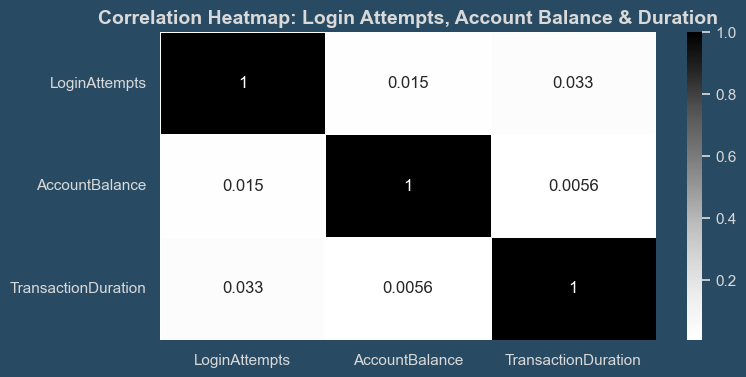

In [706]:
corr_matrix = df[['LoginAttempts', 'AccountBalance', 'TransactionDuration']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Greys", linewidths=0.5)
plt.title("Correlation Heatmap: Login Attempts, Account Balance & Duration",color='#D9D9D9')
plt.show()


#### Transaction Duration vs. Amount (Top 10 Locations)

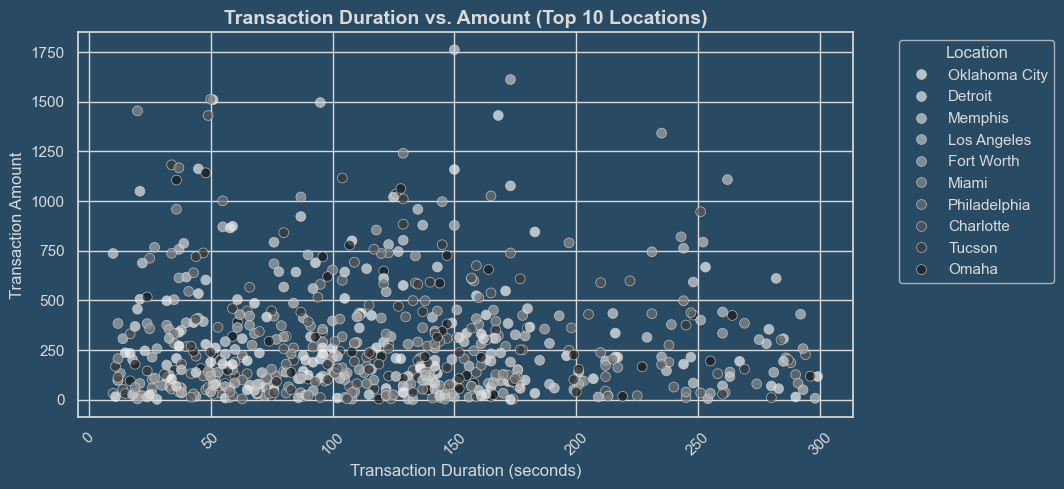

In [707]:
top_locations = df['Location'].value_counts().nlargest(10).index
filtered_df = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(10, 5))
custom_scatterplot(data=filtered_df, x="TransactionDuration", y="TransactionAmount", hue="Location", alpha=0.7)
plt.title("Transaction Duration vs. Amount (Top 10 Locations)",color='#D9D9D9')
plt.xlabel("Transaction Duration (seconds)")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## Feature Engineering

In this step, we create new features to capture transaction behavior and user patterns, enhancing our fraud detection model.

**Key Engineered Features:**

- **Time-Based Features:**  
  - *TimeSinceLastTransaction:* Seconds between the current and previous transaction.  
  - *TransactionHour:* Hour extracted from the transaction timestamp.

- **Transaction Frequency:**  
  - *TransactionFrequency:* Total transactions per account.

- **Device and IP Usage:**  
  - *DeviceUsage:* Number of accounts per device.  
  - *IPUsage:* Number of accounts per IP address.

- **Merchant Preferences:**  
  - *MerchantPreference:* Transaction count per account for each merchant.

### Time-Based Features:

In [709]:
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TransactionHour'] = df['TransactionDate'].dt.hour

### Transaction Frequency:

In [710]:
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

### Device and IP Usage:

In [711]:
df['DeviceUsage'] = df.groupby('DeviceID')['AccountID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['AccountID'].transform('count')

### Merchant Preferences:

In [712]:
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')

## Data Preprocessing

In this step, we prepare the dataset for clustering by converting categorical variables into numerical formats and scaling the features. This ensures all variables are represented appropriately and on a comparable scale.

**Key Preprocessing Tasks:**

- **Categorical Encoding:**  
  - *TransactionType:* Mapped to 0 (Debit) and 1 (Credit).  
  - *Channel & CustomerOccupation:* One-hot encoded to create binary indicator variables.

- **Feature Selection & Scaling:**  
  - Selected key features for clustering, including transaction metrics and engineered features.  
  - Applied standard scaling to normalize the feature set.


### Categorical Encoding

In [713]:
# Encode categorical features
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

# One-hot encode the Channel column
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)

df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=False)

df.head()



,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,DeviceUsage,IPUsage,MerchantPreference,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,0,San Diego,D000380,162.198.218.92,M015,70,...,6,3,1,True,False,False,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,0,Houston,D000051,13.149.61.4,M052,68,...,5,4,1,True,False,False,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,0,Mesa,D000235,215.97.143.157,M009,19,...,5,7,1,False,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,0,Raleigh,D000187,200.13.225.150,M002,26,...,6,8,1,False,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,Atlanta,D000308,65.164.3.100,M091,26,...,3,4,1,False,False,True,False,False,False,True


### Feature Selection & Scaling

In [714]:
# Select features for clustering
X = df[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
    'AccountBalance', 'TimeSinceLastTransaction', 'TransactionHour', 
    'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference',
    'TransactionType', 'Channel_ATM', 'Channel_Online', 'Channel_Branch', 'CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'  
]]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Clustering & Fraud Detection with K-Means

In this section, we leverage the K-Means clustering algorithm to segment transactions and identify potential fraud. First, we use the Elbow Method to determine the optimal number of clusters. Then, we cluster the scaled data, compute the distance of each transaction from its cluster centroid, and flag transactions that exceed a strict threshold as potential frauds.

**Key Steps:**

- **Elbow Method:**  
  Evaluate inertia for various cluster counts to identify the optimal number of clusters.

- **K-Means Clustering:**  
  Cluster the preprocessed data and assign each transaction a cluster label.

- **Distance Calculation & Thresholding:**  
  Compute distances from cluster centroids and use a high percentile threshold to flag outliers.

- **Fraud Flagging & Visualization:**  
  Highlight potential frauds—particularly in larger clusters—and visualize clusters, centroids, and flagged transactions.

This process helps in isolating transactions that deviate significantly from typical behavior, flagging them for further investigation.


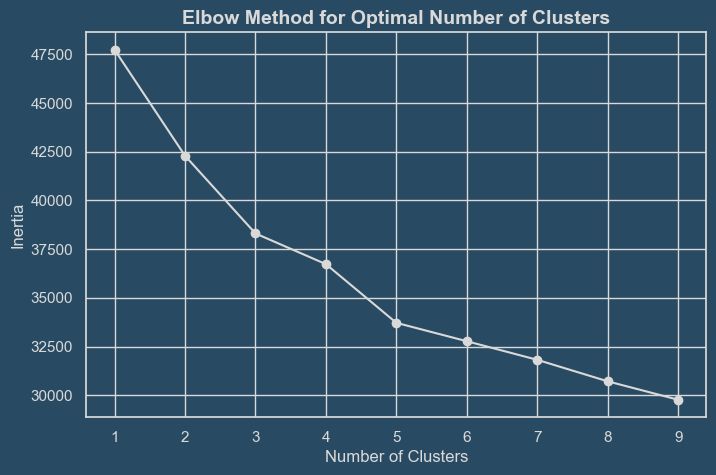

In [722]:
from sklearn.cluster import KMeans

# -------------------------------
# Elbow Method to Determine Optimal Clusters
# -------------------------------

# Calculate inertia for a range of clusters using the Elbow Method
inertia_values = []
cluster_range = range(1, 10)  # Trying cluster values from 1 to 9

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values (Elbow Plot)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', color=LIGHT_GRAY)
plt.title('Elbow Method for Optimal Number of Clusters', color=LIGHT_GRAY)
plt.xlabel('Number of Clusters', color=LIGHT_GRAY)
plt.ylabel('Inertia', color=LIGHT_GRAY)
plt.tick_params(colors=LIGHT_GRAY)
plt.show()

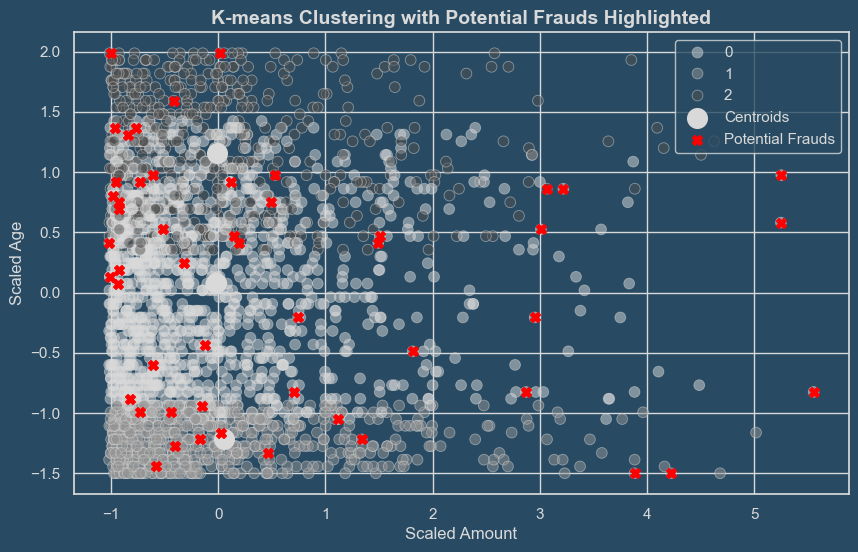

Number of potential frauds detected: 51


In [745]:
# Perform K-Means clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Calculate the distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold at the 98th percentile to flag potential frauds
threshold = np.percentile(distances, 98)

# Flag potential frauds: only consider points in sufficiently large clusters
cluster_sizes = np.bincount(kmeans_labels)
large_clusters = [i for i, size in enumerate(cluster_sizes) if size >= 20]
df['Potential_Fraud'] = np.isin(df['KMeans_Cluster'], large_clusters) & (distances > threshold)
df['KMeans_Fraud'] = np.where(df['Potential_Fraud'], 'Fraud', 'Not Fraud')

# (Optional) Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Define a grayscale palette for clusters using "Greys"
n_clusters = len(np.unique(kmeans_labels))
cluster_palette = sns.color_palette("Greys", n_colors=n_clusters)

# Plot the clustering results with potential frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                hue=kmeans_labels,
                palette=cluster_palette,
                s=60, alpha=0.5, edgecolor=LIGHT_GRAY)

# Plot centroids using LIGHT_GRAY
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c=LIGHT_GRAY, label='Centroids')

# Highlight potential fraud points with red 'X' markers
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='red', s=50, label='Potential Frauds', marker='X')

plt.title('K-means Clustering with Potential Frauds Highlighted', color=LIGHT_GRAY)
plt.xlabel('Scaled Amount', color=LIGHT_GRAY)
plt.ylabel('Scaled Age', color=LIGHT_GRAY)
plt.tick_params(colors=LIGHT_GRAY)
plt.legend(facecolor=BG_COLOR, edgecolor=LIGHT_GRAY, labelcolor=LIGHT_GRAY)
plt.show()

print(f"Number of potential frauds detected: {len(frauds)}")

## Clustering & Fraud Detection with DBSCAN

In this section, we leverage the DBSCAN clustering algorithm to segment transactions and detect potential fraud. First, we generate a k-Distance Plot to determine an optimal epsilon value by examining the 5th nearest neighbor distances. Next, we cluster the scaled data using DBSCAN, flagging noise points as potential fraud. Finally, we apply PCA to reduce the data to two dimensions for visualization. 

**Key Steps:**

- **k-Distance Plot:**  
  Evaluate the 5th nearest neighbor distances to determine an appropriate epsilon for DBSCAN.

- **DBSCAN Clustering:**  
  Cluster the preprocessed data, label transactions, and flag noise points as potential fraud.

- **Dimensionality Reduction:**  
  Use PCA to project the high-dimensional data into 2D space for effective visualization.

- **Fraud Flagging & Visualization:**  
  Highlight potential frauds with distinct markers and visualize clusters in a unified dark-themed plot with borderless markers and consistent LIGHT_GRAY text.

This process helps in identifying transactions that significantly deviate from typical behavior, flagging them for further investigation.


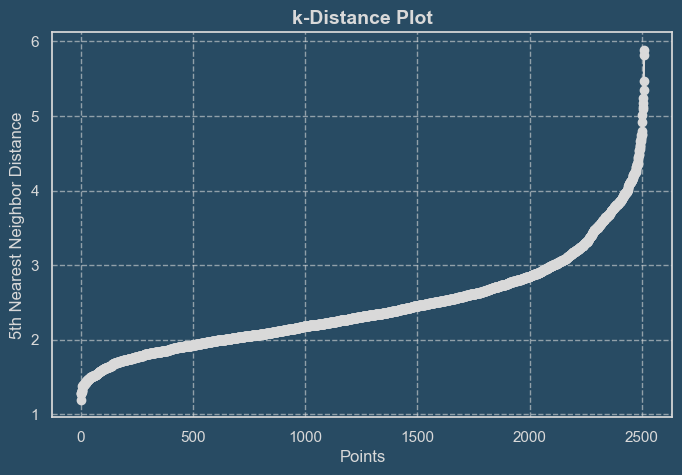

In [731]:
# ------------------------------
# k-Distance Plot using NearestNeighbors
# ------------------------------
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the 5th nearest neighbor distances
sorted_distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, color=LIGHT_GRAY, marker='o', linestyle='-')
plt.title('k-Distance Plot', color=LIGHT_GRAY, fontsize=14)
plt.xlabel('Points', color=LIGHT_GRAY, fontsize=12)
plt.ylabel('5th Nearest Neighbor Distance', color=LIGHT_GRAY, fontsize=12)
plt.tick_params(colors=LIGHT_GRAY)
plt.grid(True, linestyle='--', alpha=0.6, color=LIGHT_GRAY)
plt.show()

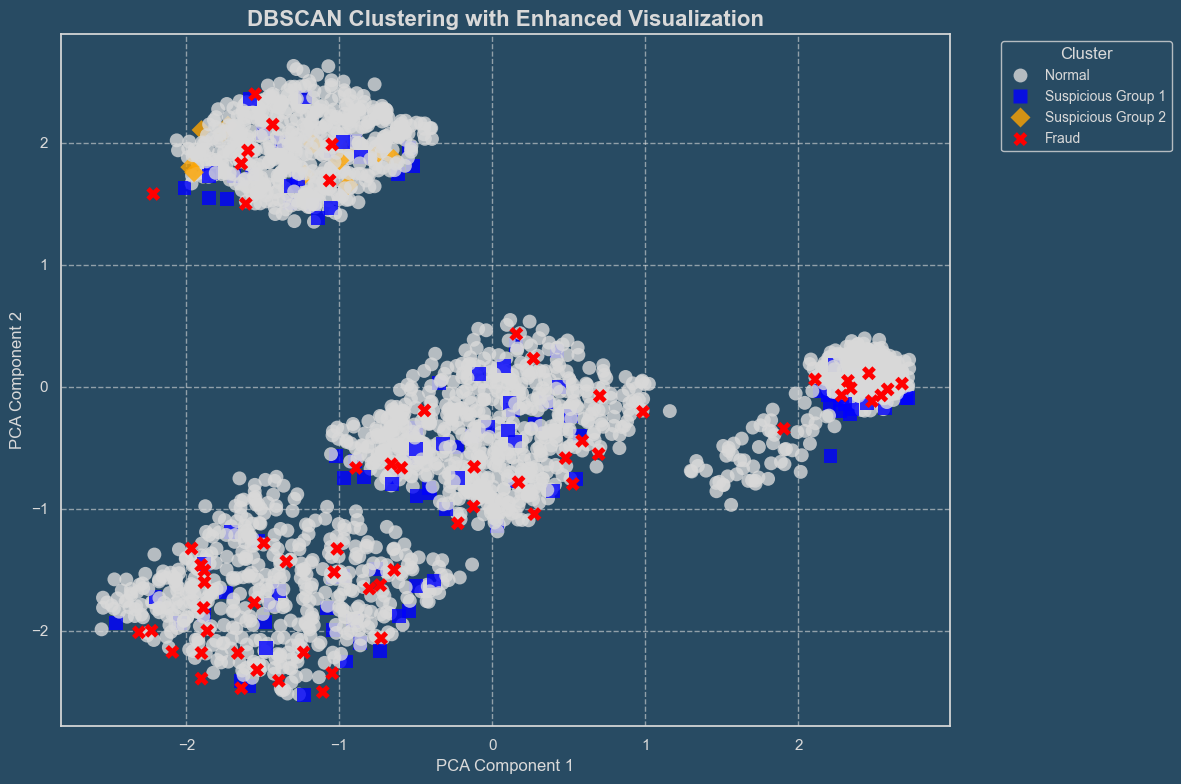

Number of potential frauds detected (DBSCAN): 62


In [730]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
# ------------------------------
# DBSCAN Clustering and Visualization
# ------------------------------
# Apply DBSCAN with specified parameters
dbscan = DBSCAN(eps=3.8, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Map DBSCAN labels to descriptive names
label_mapping = {
    -1: 'Fraud',      # Noise points are considered fraud
    0: 'Normal',      # Largest cluster
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2'
}
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map(label_mapping)

# Flag potential frauds based on DBSCAN (where label is 'Fraud')
df['DBSCAN_Fraud'] = np.where(df['DBSCAN_Cluster'] == 'Fraud', 'Fraud', 'Not Fraud')

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))

# Separate data for plotting: fraud points and non-fraud clusters
non_fraud_df = df[df['DBSCAN_Cluster'] != 'Fraud']
fraud_df = df[df['DBSCAN_Cluster'] == 'Fraud']

# Define custom palette for non-fraud clusters
custom_palette = {
    'Normal': LIGHT_GRAY,
    'Suspicious Group 1': 'blue',
    'Suspicious Group 2': 'orange'
}

# Plot non-fraud clusters using sns.scatterplot
sns.scatterplot(
    x='PCA_1', y='PCA_2',
    hue='DBSCAN_Cluster',
    data=non_fraud_df,
    palette=custom_palette,
    style='DBSCAN_Cluster',
    markers={'Normal': 'o', 'Suspicious Group 1': 's', 'Suspicious Group 2': 'D'},
    s=100,
    alpha=0.8,
    edgecolor='none' 
)

# Plot fraud points separately with red X markers and no border
plt.scatter(
    fraud_df['PCA_1'], fraud_df['PCA_2'],
    color='red', s=100, label='Fraud', marker='X', edgecolor='none'
)

plt.title('DBSCAN Clustering with Enhanced Visualization', fontsize=16, color=LIGHT_GRAY)
plt.xlabel('PCA Component 1', fontsize=12, color=LIGHT_GRAY)
plt.ylabel('PCA Component 2', fontsize=12, color=LIGHT_GRAY)
plt.tick_params(colors=LIGHT_GRAY)

# Adjust legend styling to match the theme
plt.legend(title='Cluster', title_fontsize=12, fontsize=10, 
           facecolor=BG_COLOR, edgecolor=LIGHT_GRAY, labelcolor=LIGHT_GRAY,
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6, color=LIGHT_GRAY)
plt.tight_layout()
plt.show()

# Output the number of potential frauds detected
frauds = df[df['DBSCAN_Fraud'] == 'Fraud']
print(f"Number of potential frauds detected (DBSCAN): {len(frauds)}")

## Fraud Detection with Isolation Forest

In this section, we apply the **Isolation Forest** algorithm to detect potential fraudulent transactions. Isolation Forest is a tree-based method that isolates anomalies instead of profiling normal data points. By training on scaled transaction data, we predict potential fraud cases and visualize the results using PCA for dimensionality reduction.

**Key Steps:**

- **Isolation Forest:**  
  Train the Isolation Forest model on the scaled data to detect anomalies, marking transactions as potential fraud based on a contamination rate of 2%.

- **Fraud Flagging:**  
  Map the Isolation Forest predictions to 'Fraud' and 'Not Fraud' labels.

- **Dimensionality Reduction:**  
  Use PCA to reduce the high-dimensional data into two components for visualization, making it easier to explore the anomaly detection results.

- **Fraud Detection Visualization:**  
  Plot normal transactions and potential fraud cases in a 2D PCA space. Normal transactions are shown as borderless circles, while fraud cases are highlighted with red 'X' markers. A unified dark theme is applied to the plot for better aesthetics and readability.

This process allows us to visually identify potential fraudulent transactions and assess how well the Isolation Forest model flags unusual transaction patterns.


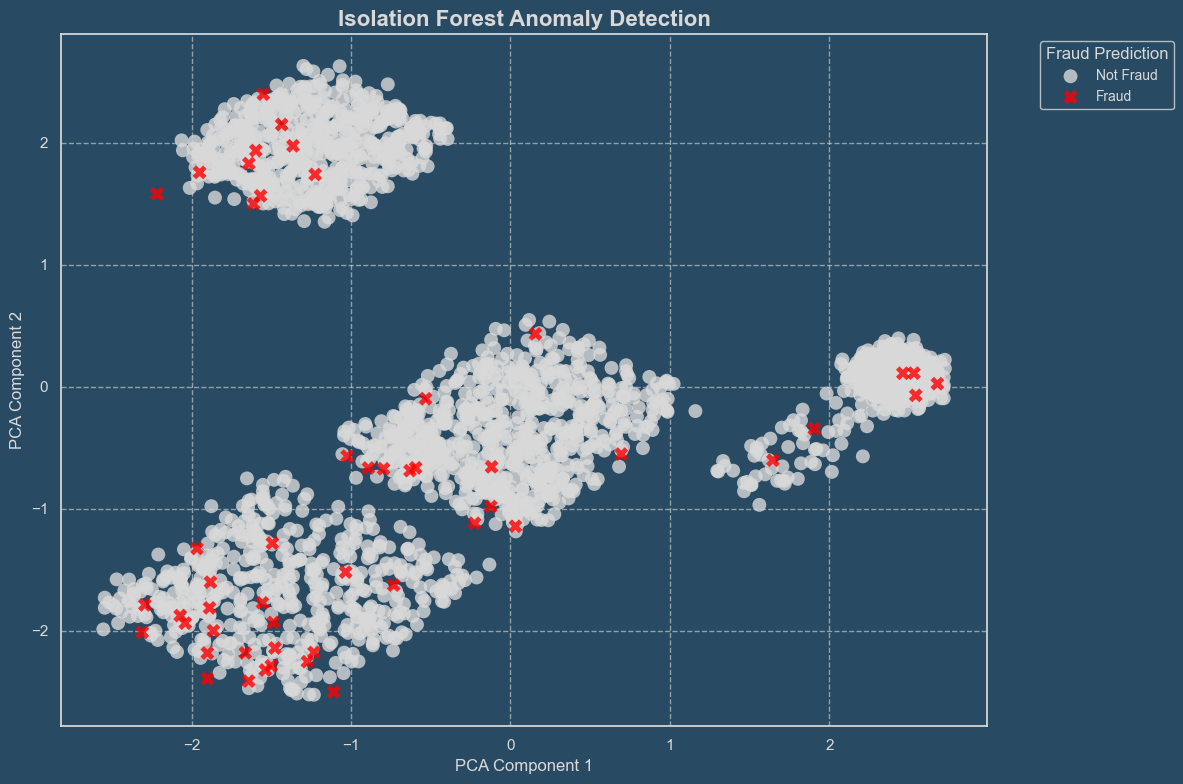

Number of potential frauds detected (Isolation Forest): 51


In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # Adjust contamination rate if needed
df['IsolationForest_Pred'] = iso_forest.fit_predict(X_scaled)

# Map results: -1 (Fraud) and 1 (Normal)
df['IsolationForest_Fraud'] = np.where(df['IsolationForest_Pred'] == -1, 'Fraud', 'Not Fraud')

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]

# Separate the data for plotting
nonfraud_df = df[df['IsolationForest_Fraud'] == 'Not Fraud']
fraud_df = df[df['IsolationForest_Fraud'] == 'Fraud']

plt.figure(figsize=(12, 8))

# Plot normal (Not Fraud) transactions as borderless circles with LIGHT_GRAY
plt.scatter(nonfraud_df['PCA_1'], nonfraud_df['PCA_2'],
            color=LIGHT_GRAY, s=100, alpha=0.8, marker='o', edgecolor='none', label='Not Fraud')

# Plot fraud transactions as red X markers with no border
plt.scatter(fraud_df['PCA_1'], fraud_df['PCA_2'],
            color='red', s=100, alpha=0.8, marker='X', edgecolor='none', label='Fraud')

# Apply unified dark theme styling
plt.title('Isolation Forest Anomaly Detection', fontsize=16, color=LIGHT_GRAY)
plt.xlabel('PCA Component 1', fontsize=12, color=LIGHT_GRAY)
plt.ylabel('PCA Component 2', fontsize=12, color=LIGHT_GRAY)
plt.tick_params(colors=LIGHT_GRAY)
plt.grid(True, linestyle='--', alpha=0.6, color=LIGHT_GRAY)

# Adjust legend styling to match the theme
plt.legend(title='Fraud Prediction', title_fontsize=12, fontsize=10,
           facecolor=BG_COLOR, edgecolor=LIGHT_GRAY, labelcolor=LIGHT_GRAY,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display detected fraud cases
frauds = df[df['IsolationForest_Fraud'] == 'Fraud']

print(f"Number of potential frauds detected (Isolation Forest): {len(frauds)}")


## Fraud Detection Comparison Across Algorithms

In this section, we compare the performance of three fraud detection methods—K-Means, DBSCAN, and Isolation Forest—by evaluating the number of transactions each algorithm flags as fraudulent. We calculate fraud counts for each method, determine the overlap among them, and visualize the results using a bar chart styled with our unified dark theme.

**Key Steps:**

- **Fraud Subset Extraction:**  
  Extract transactions flagged as fraudulent by K-Means, DBSCAN, and Isolation Forest.

- **Fraud Count Calculation:**  
  Compute the number of fraud cases detected by each algorithm and print these counts.

- **Intersection Analysis:**  
  Identify common fraud transactions among the methods to assess their agreement.

- **Visualization:**  
  Plot a bar chart comparing the fraud counts for each algorithm using a grayscale palette, with all plot elements adhering to the unified dark-themed style.

This comparative analysis provides valuable insights into the consistency and effectiveness of each fraud detection method, helping guide further investigation into anomalous transactions.


Fraud Detection Counts:
K-Means: 51
DBSCAN: 62
Isolation Forest: 51

Common Fraud Transactions:
All three algorithms: 20
K-Means & DBSCAN: 32
K-Means & Isolation Forest: 23
DBSCAN & Isolation Forest: 32


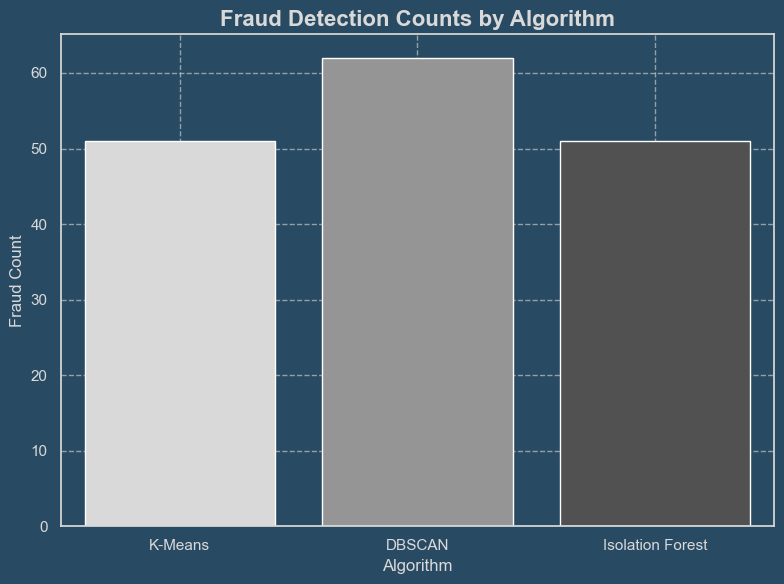

In [744]:
# Get fraud subsets for each algorithm
fraud_kmeans = df[df['KMeans_Fraud'] == 'Fraud']
fraud_dbscan = df[df['DBSCAN_Fraud'] == 'Fraud']
fraud_iso = df[df['IsolationForest_Fraud'] == 'Fraud']

# Compute fraud counts for each algorithm
kmeans_count = fraud_kmeans.shape[0]
dbscan_count = fraud_dbscan.shape[0]
iso_count = fraud_iso.shape[0]

print("Fraud Detection Counts:")
print(f"K-Means: {kmeans_count}")
print(f"DBSCAN: {dbscan_count}")
print(f"Isolation Forest: {iso_count}")

# Compute common fraud transactions (by index) among algorithms
common_all = set(fraud_kmeans.index) & set(fraud_dbscan.index) & set(fraud_iso.index)
common_kmeans_dbscan = set(fraud_kmeans.index) & set(fraud_dbscan.index)
common_kmeans_iso = set(fraud_kmeans.index) & set(fraud_iso.index)
common_dbscan_iso = set(fraud_dbscan.index) & set(fraud_iso.index)

print("\nCommon Fraud Transactions:")
print(f"All three algorithms: {len(common_all)}")
print(f"K-Means & DBSCAN: {len(common_kmeans_dbscan)}")
print(f"K-Means & Isolation Forest: {len(common_kmeans_iso)}")
print(f"DBSCAN & Isolation Forest: {len(common_dbscan_iso)}")

# Create a DataFrame for the fraud counts for plotting
fraud_counts = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'Isolation Forest'],
    'Fraud Count': [kmeans_count, dbscan_count, iso_count]
})

# Generate a grayscale palette list with as many colors as there are algorithms
palette = sns.color_palette("Greys", n_colors=len(fraud_counts))

plt.figure(figsize=(8, 6))
# Assign 'Algorithm' to both x and hue to use the palette, then disable the legend
sns.barplot(x='Algorithm', y='Fraud Count', data=fraud_counts, hue='Algorithm',
            palette=palette, dodge=False)
plt.legend([], [], frameon=False)

plt.title('Fraud Detection Counts by Algorithm', fontsize=16, color=LIGHT_GRAY)
plt.xlabel('Algorithm', fontsize=12, color=LIGHT_GRAY)
plt.ylabel('Fraud Count', fontsize=12, color=LIGHT_GRAY)
plt.tick_params(colors=LIGHT_GRAY)
plt.grid(True, linestyle='--', alpha=0.6, color=LIGHT_GRAY)
plt.tight_layout()
plt.show()